In [7]:
import numpy as np
import pandas as pd
from time import time

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns; sns.set() 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt

### Set path to the data set
#dataset_path = "GSE75688_GEO_processed_Breast_Cancer_TestPG_T1.csv"
## Load data
#data = pd.read_csv(dataset_path,header=0,index_col=0)

rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'gbm_tsn.csv'
datanew = pd.read_csv(filename)
datanew.describe

<bound method NDFrame.describe of              F1         F2  Class     F3               F4
0     19.555715 -66.420423  Tumor  BT_S2       Neoplastic
1    -66.467768  -4.840194  Tumor  BT_S2  Oligodendrocyte
2      8.197811 -63.763646  Tumor  BT_S2       Neoplastic
3     -6.468824 -51.283635  Tumor  BT_S2       Neoplastic
4     -9.436247 -53.896430  Tumor  BT_S2       Neoplastic
...         ...        ...    ...    ...              ...
3584  40.472940 -49.749664  Tumor  BT_S6         Vascular
3585 -12.666931  -3.672656  Tumor  BT_S6           Immune
3586  41.667127 -49.692359  Tumor  BT_S6         Vascular
3587  40.824259 -49.044548  Tumor  BT_S6         Vascular
3588  41.268709 -49.409236  Tumor  BT_S6         Vascular

[3589 rows x 5 columns]>

In [8]:
y = datanew['F4'].values
X = datanew.drop(['Class', 'F3', 'F4'], axis=1)

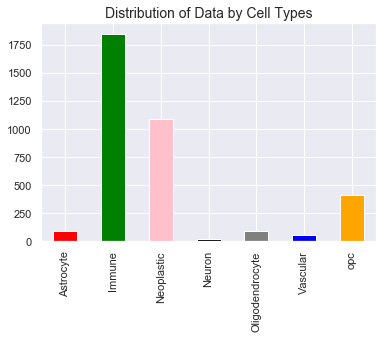

In [9]:
#patterns_colors = ['Red','Yellow','#996633', 'Green', 'Blue']

patterns_colors = ['red','green','pink', 'black', 'gray', 'blue', 'orange']

patterns_labels = ['Astrocyte', 'Immune', 'Neoplastic', 'Neuron', 'Oligodendrocyte', 'Vascular', 'opc']

correct_Pattern_labels = datanew['F4'].values

patterns_counts = datanew['F4'].value_counts().sort_index()

patterns_counts.index = patterns_labels

patterns_counts.plot(kind='bar',color=patterns_colors,
                         title='Distribution of Data by Cell Types')
patterns_counts
plt.show()

In [10]:
patterns_counts

Astrocyte            88
Immune             1847
Neoplastic         1091
Neuron               21
Oligodendrocyte      85
Vascular             51
opc                 406
Name: F4, dtype: int64

In [11]:
true_labels = y

for n, i in enumerate(true_labels):
    if i == 'Astrocyte':
        true_labels[n] = 1
    if i == 'Immune':
        true_labels[n] = 2    
    if i == 'Neoplastic':
        true_labels[n] = 3
    if i == 'Neuron':
        true_labels[n] = 4
    if i == 'Oligodendrocyte':
        true_labels[n] = 5
    if i == 'Vascular':
        true_labels[n] = 6
    if i == 'opc':
        true_labels[n] = 7

print(true_labels)

[3 5 3 ... 6 6 6]


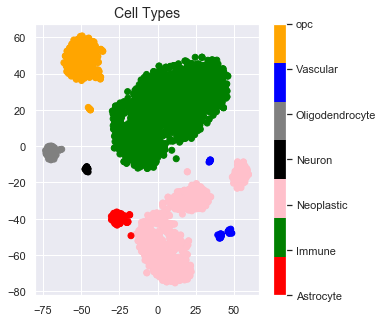

In [12]:
import matplotlib
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
X1 = datanew['F1'].values
X2 = datanew['F2'].values
cells = ("Astrocyte", "Immune", "Neoplastic", "Neuron", "Oligodendrocyte", "Vascular", "opc")
colors = ("red", "green", "pink", "black", "gray", "blue", "orange")
fig = plt.figure(figsize=(5,5))
plt.scatter(X1, X2, c=true_labels, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(true_labels),max(true_labels)/float(len(colors)))
cb.set_ticks(loc+1)
plt.title('Cell Types')
cb.set_ticklabels(cells)